In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
df_customers = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_geolocation_dataset.csv')
df_orderitem = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_order_items_dataset.csv')
df_payment = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_products_dataset.csv')
df_seller = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_sellers_dataset.csv')
df_productcategory = pd.read_csv('/content/drive/MyDrive/olist/orders/product_category_name_translation.csv')
df_dates = pd.read_csv('/content/drive/MyDrive/olist/orders/purchases_dates.csv')


In [3]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
df_orderitem.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
df_productcategory.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
df_dates.head()

,purchase_date,Sum of price
0,2016-09-04 00:00:00,72.890003
1,2016-09-05 00:00:00,59.500000
2,2016-09-15 00:00:00,134.970005
3,2016-10-02 00:00:00,100.000000
4,2016-10-03 00:00:00,463.479998


## Data Exploration and Analysis

In [13]:
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x[0:10])
df_orders['order_purchase_date'] = pd.to_datetime(df_orders['order_purchase_date'])


In [14]:
df_orders = df_orders.drop(['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                             'order_delivered_customer_date','order_estimated_delivery_date'], axis = 1)

In [15]:
df_orders

,order_id,customer_id,order_status,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08


In [16]:
df_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [17]:
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.orm import sessionmaker

In [18]:
# Step 1: Create an in-memory SQLite database
engine = create_engine('sqlite:///:memory:', echo=False)

# Step 2: Write the DataFrames to SQL tables
df_orders.to_sql('orders', con=engine, index=False, if_exists='replace')
df_payment.to_sql('payments', con=engine, index=False, if_exists='replace')

# Step 3: Connect to the database using SQLAlchemy
Session = sessionmaker(bind=engine)
session = Session()
metadata = MetaData()
metadata.reflect(bind=engine)

# Step 4: Define the tables using SQLAlchemy's Table class
orders_table = Table('orders', metadata, autoload_with=engine)
payments_table = Table('payments', metadata, autoload_with=engine)

# Step 5: Perform a SQL JOIN (INNER JOIN on 'order_id')
from sqlalchemy import select, union_all,func

# LEFT JOIN: orders left join payments
left_join_stmt = select(
    func.coalesce(orders_table.c.order_id, payments_table.c.order_id).label('order_id'),
    *(col for col in orders_table.c if col.name != 'order_id'),  # Select all columns except order_id
    *(col for col in payments_table.c if col.name != 'order_id')  # Select all columns except order_id
).outerjoin(
    payments_table, orders_table.c.order_id == payments_table.c.order_id
)

# RIGHT JOIN: payments left join orders
right_join_stmt = select(
    func.coalesce(orders_table.c.order_id, payments_table.c.order_id).label('order_id'),
    *(col for col in orders_table.c if col.name != 'order_id'),  # Select all columns except order_id
    *(col for col in payments_table.c if col.name != 'order_id')  # Select all columns except order_id
).outerjoin(
    orders_table, payments_table.c.order_id == orders_table.c.order_id
)

# Combine the two joins using UNION ALL
full_outer_join_stmt = union_all(left_join_stmt, right_join_stmt)


# Remove duplicates using DISTINCT
distinct_full_outer_join_stmt = select(full_outer_join_stmt.subquery()).distinct()

# Step 6: Execute the query
result = session.execute(distinct_full_outer_join_stmt).fetchall()


In [19]:
# Step 8: Convert the result to a DataFrame manually
# Extract column names from the select statement
columns = [col.name for col in distinct_full_outer_join_stmt.selected_columns]

# Convert to DataFrame using the fetched results and column names
df_orderpayment = pd.DataFrame(result, columns=columns)

df_orderpayment

,order_id,customer_id,order_status,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2.0,voucher,1.0,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,3.0,voucher,1.0,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,1.0,credit_card,4.0,441.16


In [20]:
df_orderpayment.dropna(axis = 0, inplace = True)
df_orderpayment

,order_id,customer_id,order_status,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2.0,voucher,1.0,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,3.0,voucher,1.0,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,1.0,credit_card,4.0,441.16


In [21]:
df_orderpayment = df_orderpayment[
    ~(df_orderpayment['order_status'].isin(['canceled', 'unavailable']))
]

In [22]:
df_orderpayment

,order_id,customer_id,order_status,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2.0,voucher,1.0,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,3.0,voucher,1.0,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,1.0,credit_card,4.0,441.16


## 1- Total Revenue

In [23]:
Total_Revenue = df_orderpayment['payment_value'].sum()
Total_Revenue_Millions = round(Total_Revenue/1000000,2)

print('The total revenue generated by Olist is R${}M'.format(Total_Revenue_Millions))

The total revenue generated by Olist is R$15.74M


## 2- Revenue Trend

In [24]:
# Create a quartely time period for the payment value

#1. create a new dataframe with only the order purchase date and payment value columns
revenue_trend = df_orderpayment.loc[:,['order_purchase_date', 'payment_value']]

#2. set the order_purchase_date as the index of the dataframe
revenue_trend = revenue_trend.set_index('order_purchase_date')

#3. Group the order_puchase_date by quarter and find the sum of payment value for each quarter
quarter_total_revenue = revenue_trend.resample('Q', closed='right').agg({'payment_value': 'sum'})

# Show result
quarter_total_revenue

,payment_value
order_purchase_date,
2016-09-30,136.23
2016-12-31,51677.15
2017-03-31,846285.10
2017-06-30,1488742.01
2017-09-30,1958125.57
2017-12-31,2799338.97
2018-03-31,3235342.38
2018-06-30,3322546.83
2018-09-30,2036942.77


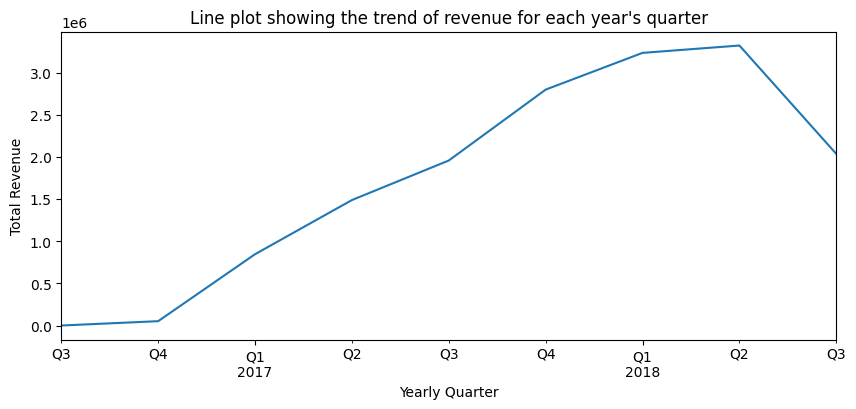

In [25]:
# Create a line plot to show the trend of revenue overtime

fig,ax = plt.subplots(figsize = (10,4))

quarter_total_revenue.plot(ax = ax, legend = False)

plt.xlabel('Yearly Quarter')
plt.ylabel('Total Revenue')
plt.title("Line plot showing the trend of revenue for each year's quarter")
plt.show()

In [26]:
df_orders2 = df_orders[
    ~(df_orders['order_status'].isin(['canceled', 'unavailable']))
]

## 3-The total number of orders placed on Olist

In [27]:
num_of_orders = len(df_orders2['order_id'].unique())

print('The total number of orders placed on Olist is {}'.format(num_of_orders))

The total number of orders placed on Olist is 98207


In [28]:
# Create a monthly time period for orders placed

#1. create a new dataframe with only the order_id columns and order purchase date
orders_placed_trend = df_orders2.loc[:,['order_id', 'order_purchase_date']]

#2. set the order_purchase_date as the index of the dataframe
orders_placed_trend = orders_placed_trend.set_index('order_purchase_date')

#3. Rename the column of the dataframe
orders_placed_trend = orders_placed_trend.rename(columns = {'order_id' : 'order_id_count'})

#4. Group the order_puchase_date by quarter and find the count of each quarter
monthly_order_placed = orders_placed_trend.resample('M').agg({'order_id_count': 'count'})

# Show result
monthly_order_placed

,order_id_count
order_purchase_date,
2016-09-30,2
2016-10-31,293
2016-11-30,0
2016-12-31,1
2017-01-31,787
2017-02-28,1718
2017-03-31,2617
2017-04-30,2377
2017-05-31,3640


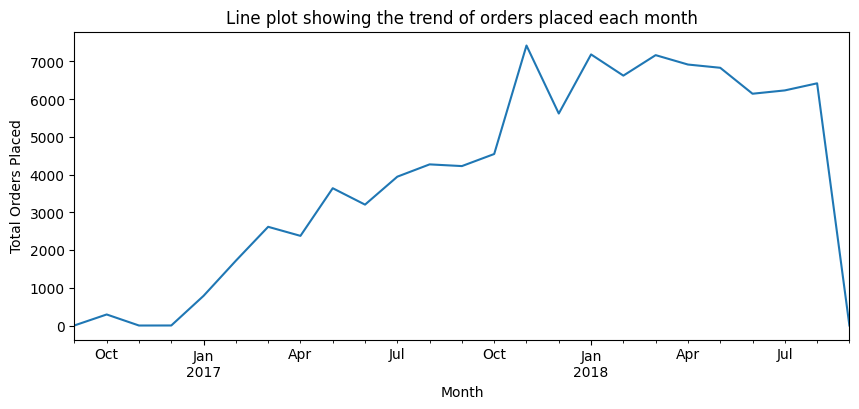

In [29]:
# Create a line plot to show the trend of orders placed monthly

fig,ax = plt.subplots(figsize = (10,4))

monthly_order_placed.plot(ax = ax, legend = False)

plt.xlabel('Month')
plt.ylabel('Total Orders Placed')
plt.title("Line plot showing the trend of orders placed each month")
plt.show()

In [30]:
# Assuming df_products, df_productcategory, df_orderitem are your DataFrames
df_products.to_sql('products', con=engine, index=False, if_exists='replace')
df_productcategory.to_sql('productcategory', con=engine, index=False, if_exists='replace')
df_orderitem.to_sql('orderitem', con=engine, index=False, if_exists='replace')

metadata = MetaData()
metadata.reflect(bind=engine)

# Accessing the tables
products_table = metadata.tables['products']
productcategory_table = metadata.tables['productcategory']
orderitem_table = metadata.tables['orderitem']

from sqlalchemy import select

# Inner join products with productcategory and orderitem, avoiding duplicated product_category_name and product_id
inner_join_stmt = select(
    # Ensure product_category_name appears only once
    func.coalesce(products_table.c.product_category_name, productcategory_table.c.product_category_name).label('product_category_name'),

    # Ensure product_id appears only once
    func.coalesce(products_table.c.product_id, orderitem_table.c.product_id).label('product_id'),

    # Select all columns from products_table except product_category_name and product_id
    *(col for col in products_table.c if col.name not in ['product_category_name', 'product_id']),

    # Select all columns from productcategory_table except product_category_name
    *(col for col in productcategory_table.c if col.name != 'product_category_name'),

    # Select all columns from orderitem_table except product_id
    *(col for col in orderitem_table.c if col.name != 'product_id')
).join(
    productcategory_table,
    products_table.c.product_category_name == productcategory_table.c.product_category_name
).join(
    orderitem_table,
    orderitem_table.c.product_id == products_table.c.product_id
)

# To execute the query
with engine.connect() as conn:
    result = conn.execute(inner_join_stmt).fetchall()

In [31]:
# Extract column names from the select statement
columns = [col.name for col in inner_join_stmt.selected_columns]

# Convert to DataFrame using the fetched results and column names
df_orderproduct = pd.DataFrame(result, columns=columns)


In [32]:
df_orderproduct

,product_category_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,perfumaria,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,artes,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,esporte_lazer,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,bebes,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,utilidades_domesticas,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
111019,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111020,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111021,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


## 3- most popular product categories on Olist, and how do their sales volumes compare to each other

In [33]:
# Group the product_category_name_english by its categories and find the count of each category
grouped_product_category = df_orderproduct.groupby('product_category_name_english')['product_category_name_english'].count().sort_values(ascending = False)

# Convert it to a Dataframe
grouped_product_category = pd.DataFrame(grouped_product_category)

# Rename the count column
grouped_product_category = grouped_product_category.rename(columns = {'product_category_name_english':'product_count'})

# Show the result
grouped_product_category

,product_count
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
...,...
arts_and_craftmanship,24
la_cuisine,14
cds_dvds_musicals,14


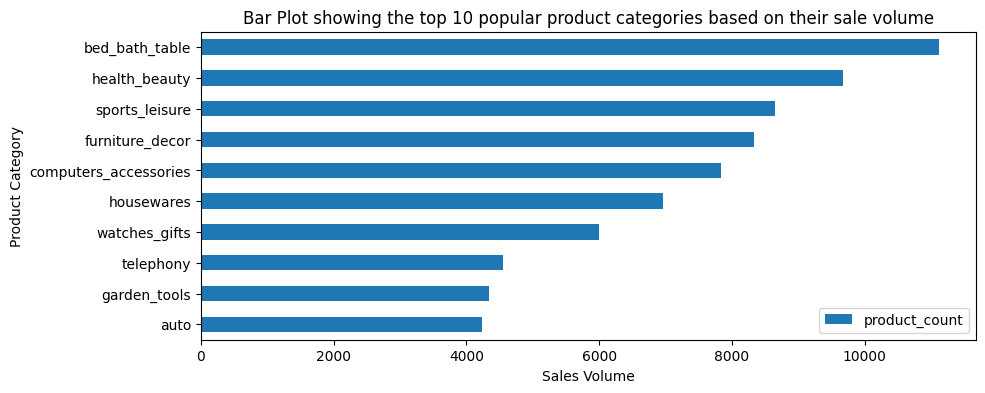

In [34]:
# Draw the bar plot for the above table

# Select top 10 categories
top10_product_category = grouped_product_category.head(10)

# Set the axis
fig,ax = plt.subplots(figsize = (10,4))

# plot the barplot using plt and have the values in the x axis
top10_product_category.sort_values(by = 'product_count').plot(ax = ax, kind = 'barh')

# Plot the bar chart using seaorn
#sns.barplot(x = top10_product_category['product_count'] , y= top10_product_category.index )

plt.xlabel('Sales Volume')
plt.ylabel('Product Category')
plt.title("Bar Plot showing the top 10 popular product categories based on their sale volume")
plt.show()

Bed Bath Table, Health Beauty, Sport Leisure, Furniture Decor, Computer Accessories, Housewares, Watches Gifts, Telephone, Garden Tools and Auto are the most popular product categories based on their sale volume.

However, Bed Bath Table accounts for the product with the highest sales volume, with 11,115 products sold between January 2017 and August 2018


## 4-average order value

In [35]:
# This is gotten from the result of the first business question. We take the total revenue and divide by its length
average_order_value = df_orderpayment['payment_value'].mean()
average_order_value = round(average_order_value,2)

print('The average order value is R${}'.format(average_order_value))

The average order value is R$153.44


 # How does this value vary by payment method

In [36]:
# Group the payment type by its categories and find the mean of payment value for each category.
# sort_values(ascending = False) orders the result in descending order
# reset_index convertes the result to a dataframe
# name ='mean_payment_value' renames the new column created
average_order_per_paymentmethod = df_orderpayment.groupby('payment_type')['payment_value'].mean().sort_values(ascending = False).reset_index(name = 'mean_payment_value')

# Set payment_type column  as my index
average_order_per_paymentmethod.set_index('payment_type', inplace=True)

# Show the result
average_order_per_paymentmethod

,mean_payment_value
payment_type,
credit_card,162.703940
boleto,144.674871
debit_card,140.117249
voucher,62.332870


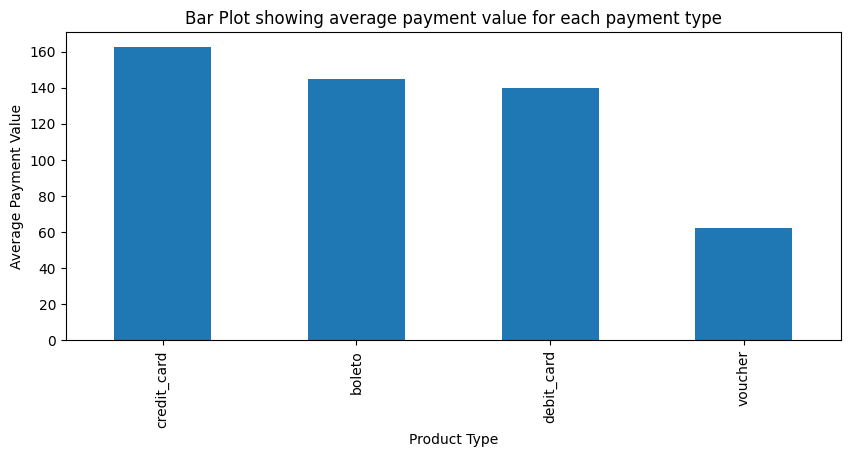

In [37]:
# Draw the bar plot for the above table

# Set the axis
fig, ax = plt.subplots(figsize = (10,4))

# Plot the bar
average_order_per_paymentmethod.plot.bar(ax = ax, legend = False)

plt.xlabel('Product Type')
plt.ylabel('Average Payment Value')
plt.title("Bar Plot showing average payment value for each payment type")
plt.show()

Credit card has the highest average payment value, followed by boleto and debit card. Voucher accounts for the least average payment value.

In [38]:
df_orderproduct

,product_category_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,perfumaria,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,artes,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,esporte_lazer,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,bebes,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,utilidades_domesticas,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
111019,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111020,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111021,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


 ## How does this value vary by product category

In [39]:
# Create a new column that sums price and frieght vale to get the payment value
df_orderproduct['payment_value'] = df_orderproduct['price'] + df_orderproduct['freight_value']

# Group the product_category_name_english by its categories and find the average payment value for each category
average_order_per_productcategory = df_orderproduct.groupby('product_category_name_english')['payment_value'].mean().sort_values(ascending = False).reset_index(name = 'mean_payment_value')

# Set product_category_name_english column  as my index
average_order_per_productcategory.set_index('product_category_name_english', inplace=True)

# Show the result
average_order_per_productcategory

,mean_payment_value
product_category_name_english,
computers,1146.795222
small_appliances_home_oven_and_coffee,660.441711
home_appliances_2,520.663529
agro_industry_and_commerce,369.689009
musical_instruments,309.025544
...,...
food_drink,70.818237
cds_dvds_musicals,68.213571
diapers_and_hygiene,54.904359


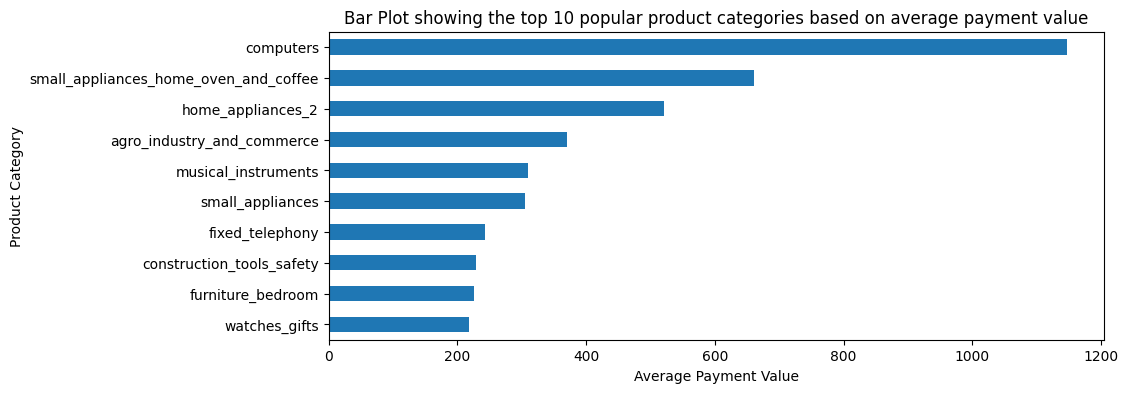

In [40]:
# Draw the bar plot for the above table

# Select top 10 categories
top10_average_order_per_productcategory = average_order_per_productcategory.head(10)

# Set the axis
fig,ax = plt.subplots(figsize = (10,4))

# plot the barplot using plt and have the values in the x axis
top10_average_order_per_productcategory.sort_values(by = 'mean_payment_value').plot(ax = ax, kind = 'barh', legend = False)

plt.xlabel('Average Payment Value')
plt.ylabel('Product Category')
plt.title("Bar Plot showing the top 10 popular product categories based on average payment value")

plt.show()

Computers, Small appliances home oven and coffee, home appliances2, agro industry and commerce, musical instruments, small appliances, fixed telephone, construction toold safety, furniture bedroom and watches gift are the highest product categories based on the average payment value.

However, Computers have the overall highest average payment value with a value of 1146.79 Brazilain Real

## Who are the top active sellers

In [41]:
# Group the sellers by seller id and find the count of order id for each seller id.
active_sellers = df_orderitem.groupby('seller_id')['order_id'].count().sort_values(ascending = False).reset_index(name = 'order_count_per_seller_id')

#Set seller_id column as index
active_sellers .set_index('seller_id', inplace = True)

# Show the result
active_sellers.head(10)

,order_count_per_seller_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
955fee9216a65b617aa5c0531780ce60,1499
1025f0e2d44d7041d6cf58b6550e0bfa,1428
7c67e1448b00f6e969d365cea6b010ab,1364
ea8482cd71df3c1969d7b9473ff13abc,1203


## What is the distribution of seller ratings on Olist, and how does this impact sales performance?

In [42]:
# Assuming df_reviews and df_orderitem are your DataFrames
df_reviews.to_sql('reviews', con=engine, index=False, if_exists='replace')
df_orderitem.to_sql('orderitem', con=engine, index=False, if_exists='replace')
metadata = MetaData()
metadata.reflect(bind=engine)

# Accessing the tables
reviews_table = metadata.tables['reviews']
orderitem_table = metadata.tables['orderitem']
# Inner join reviews with orderitem, avoiding duplicated order_id
inner_join_stmt = select(
    # Ensure order_id appears only once
    func.coalesce(reviews_table.c.order_id, orderitem_table.c.order_id).label('order_id'),

    # Select all columns from reviews_table except order_id
    *(col for col in reviews_table.c if col.name != 'order_id'),

    # Select all columns from orderitem_table except order_id
    *(col for col in orderitem_table.c if col.name != 'order_id')
).join(
    orderitem_table,
    reviews_table.c.order_id == orderitem_table.c.order_id
)

# To execute the query
with engine.connect() as conn:
    result3 = conn.execute(inner_join_stmt).fetchall()

In [43]:
# Extract column names from the select statement
columns = [col.name for col in inner_join_stmt.selected_columns]

# Convert to DataFrame using the fetched results and column names
df_orderreview = pd.DataFrame(result3, columns=columns)

In [44]:
df_orderreview

,order_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,73fc7af87114b39712e6da79b0a377eb,7bc2406110b926393aa56f80a40eba40,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,a548910a1c6147796b98fdf73dbeba33,80e641a11e56f04c1ad469d5645fdfde,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,f9e4b658b201a9f2ecdecbb34bed034b,228ce5500dc1d8e020d8d1322874b6f0,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,658677c97b385a9be170737859d3511b,e64fb393e7b32834bb789ff8bb30750e,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,2a8c23fee101d4d5662fa670396eb8da,574ed12dd733e5fa530cfd4bbf39d7c9,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30,1,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20
112368,22ec9f0669f784db00fa86d035cf8602,f3897127253a9592a73be9bdfdf4ed7a,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42,1,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77
112369,55d4004744368f5571d1f590031933e4,b3de70c89b1510c4cd3d0649fd302472,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59
112370,7725825d039fc1f0ceb7635e3f7d9206,1adeb9d84d72fe4e337617733eb85149,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13,1,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,2018-06-26 18:15:29,50.95,15.46


In [45]:
df_orderreview.drop(['review_comment_title','review_comment_message'], axis = 1, inplace = True)


In [46]:
# Group the column needed for this analysis and show their value count

# Group the seller_id column by each individual seller and find the average review score for each seller,
# then round it to a whole number
sellerid_reveiwscore_mean_df = round(df_orderreview.groupby('seller_id')['review_score'].mean(),0).reset_index()

# Show the result
sellerid_reveiwscore_mean_df

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,4.0
1,001cca7ae9ae17fb1caed9dfb1094831,4.0
2,001e6ad469a905060d959994f1b41e4f,1.0
3,002100f778ceb8431b7a1020ff7ab48f,4.0
4,003554e2dce176b5555353e4f3555ac8,5.0
...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,1.0
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.0
3087,ffeee66ac5d5a62fe688b9d26f83f534,4.0
3088,fffd5413c0700ac820c7069d66d98c89,4.0


In [47]:
# Group the review score column by its ratings and find the number of sellers placed under each rating
grouped_reviewscore_bysellers  = sellerid_reveiwscore_mean_df.groupby('review_score')['seller_id'].count().sort_values(ascending = False).reset_index(name = 'count')

# Set review_score as index
grouped_reviewscore_bysellers.set_index('review_score', inplace = True)

# Show the result
grouped_reviewscore_bysellers

,count
review_score,
4.0,1636
5.0,869
3.0,304
1.0,155
2.0,126


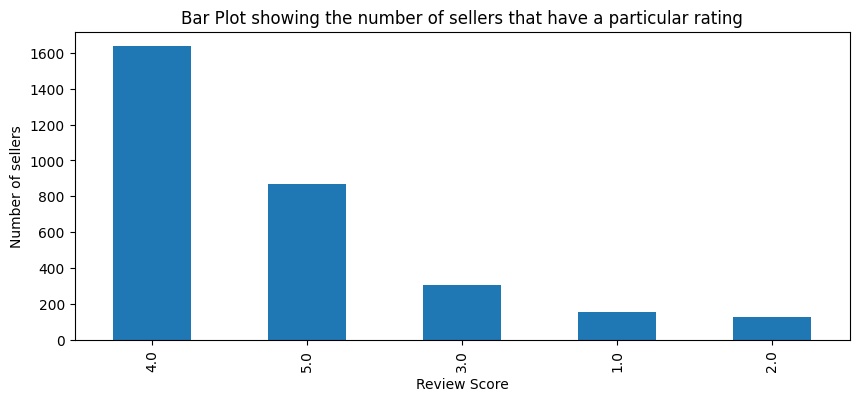

In [48]:
# Draw the bar plot for the above table

# Set the axis
fig, ax = plt.subplots(figsize = (10,4))

# Plot the bar
grouped_reviewscore_bysellers.plot.bar(ax = ax, legend = False)

plt.xlabel('Review Score')
plt.ylabel('Number of sellers')
plt.title("Bar Plot showing the number of sellers that have a particular rating")
plt.show()

From the chart above, more sellers recieved an average of 4.0 rating for the sale of their products. Only a few sellers recieved a low rating of (1.0 and 2.0)

## How does each rating impact sales volume?

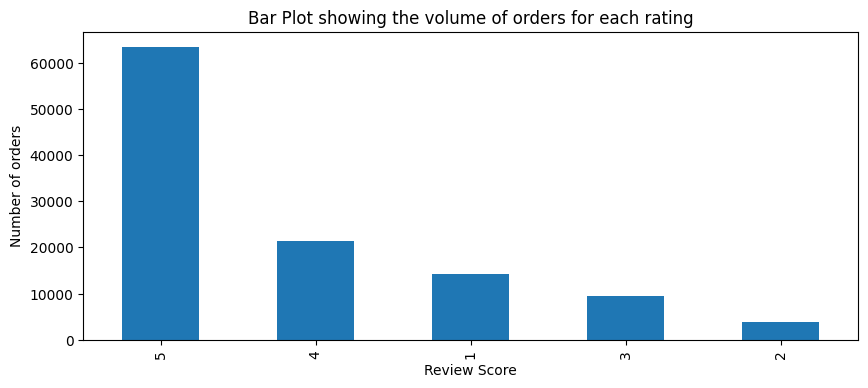

In [49]:
# Group the review score column by its ratings and find number of orders that recieve each rating
grouped_reviewscore_byorders = df_orderreview.groupby('review_score')['order_id'].count().sort_values(ascending = False)

# Set the axis
fig, ax = plt.subplots(figsize = (10,4))

# Plot the bar
grouped_reviewscore_byorders.plot.bar()

plt.xlabel('Review Score')
plt.ylabel('Number of orders')
plt.title("Bar Plot showing the volume of orders for each rating")
plt.show()

## How many customers have made repeat purchases on Olist?

In [50]:
print('This table contains {} rows'.format(df_customers.shape[0]))
print('There are {} unique customer_id'.format(len(df_customers['customer_id'].unique())))
print('There are {} unique customer_unique_id'.format(len(df_customers['customer_unique_id'].unique())))

This table contains 99441 rows
There are 99441 unique customer_id
There are 96096 unique customer_unique_id


In [51]:
number_of_uniquecustomers = df_customers['customer_unique_id'].value_counts()
number_of_uniquecustomers = number_of_uniquecustomers[number_of_uniquecustomers > 1]
num_of_repeating_customers = len(number_of_uniquecustomers)
print('There are {} repeating customers'.format(num_of_repeating_customers))

There are 2997 repeating customers


In [52]:
num_of_onetime_customers = len(df_customers['customer_unique_id'].unique()) - num_of_repeating_customers
print('There are {} one time customers'.format(num_of_onetime_customers))

There are 93099 one time customers


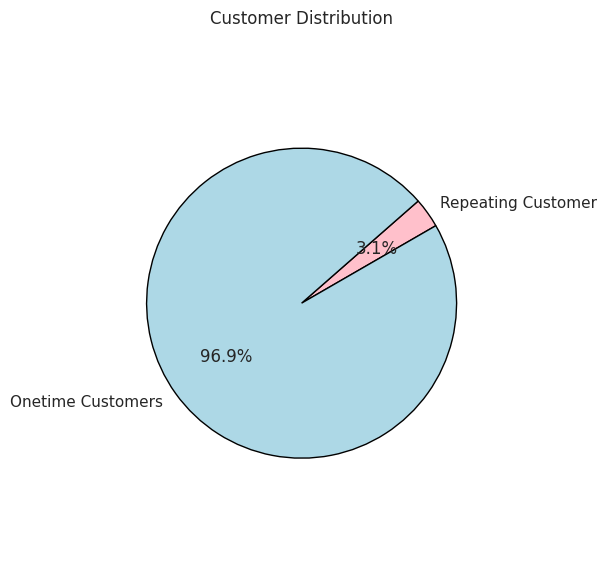

In [71]:
# Set Seaborn style
sns.set(style="whitegrid")

# Define the data: number of repeating and one-time customers
labels = ['Repeating Customer', 'Onetime Customers']
sizes = [num_of_repeating_customers, num_of_onetime_customers]
colors = ['pink', 'lightblue']  # Desired colors

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,            # The size of each slice
    labels=labels,    # The labels for each slice
    colors=colors,    # Colors for each slice
    autopct='%1.1f%%',  # Add percentages on the pie chart
    startangle=30,    # Start the chart at 90 degrees
    wedgeprops={'edgecolor': 'black'}  # Add black border to the slices
)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title
plt.title('Customer Distribution')

# Show the plot
plt.tight_layout()
plt.show()

In [58]:
# Assuming df_products, df_productcategory, df_orderitem are your DataFrames
df_customers.to_sql('customers', con=engine, index=False, if_exists='replace')
df_orders.to_sql('orders', con=engine, index=False, if_exists='replace')
df_payment.to_sql('payment', con=engine, index=False, if_exists='replace')

metadata = MetaData()
metadata.reflect(bind=engine)

# Accessing the tables
customers_table = metadata.tables['customers']
orders_table = metadata.tables['orders']
payment_table = metadata.tables['payment']

from sqlalchemy import select

# Inner join customers, orders, and orderitem, avoiding duplicated customer_id and order_id
inner_join_stmt4 = select(
    # Ensure customer_id appears only once
    func.coalesce(customers_table.c.customer_id, orders_table.c.customer_id).label('customer_id'),

    # Ensure order_id appears only once
    func.coalesce(orders_table.c.order_id, payment_table.c.order_id).label('order_id'),

    # Select all columns from customers_table except customer_id
    *(col for col in customers_table.c if col.name != 'customer_id'),

    # Select all columns from orders_table except customer_id and order_id
    *(col for col in orders_table.c if col.name not in ['customer_id', 'order_id']),

    # Select all columns from orderitem_table except order_id
    *(col for col in payment_table.c if col.name != 'order_id')
).join(
    orders_table,
    customers_table.c.customer_id == orders_table.c.customer_id
).join(
    payment_table,
    payment_table.c.order_id == orders_table.c.order_id
)

# To execute the query
with engine.connect() as conn:
    result4 = conn.execute(inner_join_stmt4).fetchall()

In [59]:
# Extract column names from the select statement
columns = [col.name for col in inner_join_stmt4.selected_columns]

# Convert to DataFrame using the fetched results and column names
df_ordercustomerpayment = pd.DataFrame(result4, columns=columns)


In [60]:
df_ordercustomerpayment

,customer_id,order_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,delivered,2017-05-16,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,delivered,2018-01-12,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,delivered,2018-05-19,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,delivered,2018-03-13,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,delivered,2018-07-29,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,delivered,2018-04-07,1,credit_card,6,88.78
103882,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,delivered,2018-04-04,1,credit_card,3,129.06
103883,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,delivered,2018-04-08,1,credit_card,5,56.04
103884,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,delivered,2017-11-03,1,credit_card,2,711.07


##  What Geolocation has high customer density.

In [61]:
# Create a new dataframe using only the required columns from customer_orders_orderpayments_df
geolocation_order_df = df_ordercustomerpayment.loc[:,['customer_state','order_id', 'payment_value']]
geolocation_order_df.head()

,customer_state,order_id,payment_value
0,SP,00e7ee1b050b8499577073aeb2a297a1,146.87
1,SP,29150127e6685892b6eab3eec79f59c7,335.48
2,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73
3,SP,951670f92359f4fe4a63112aa7306eba,173.30
4,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25


In [63]:
# Group the customer state by its categories and find the count of each category
geolocation_order_grouped_df = geolocation_order_df.groupby('customer_state')['order_id'].count().sort_values(ascending = False).reset_index(name = 'count')

# Set customer state as the index
geolocation_order_grouped_df.set_index('customer_state',inplace = True)

# Show the result
geolocation_order_grouped_df

,count
customer_state,
SP,43622
RJ,13527
MG,12102
RS,5668
PR,5262
SC,3754
BA,3610
DF,2204
GO,2112


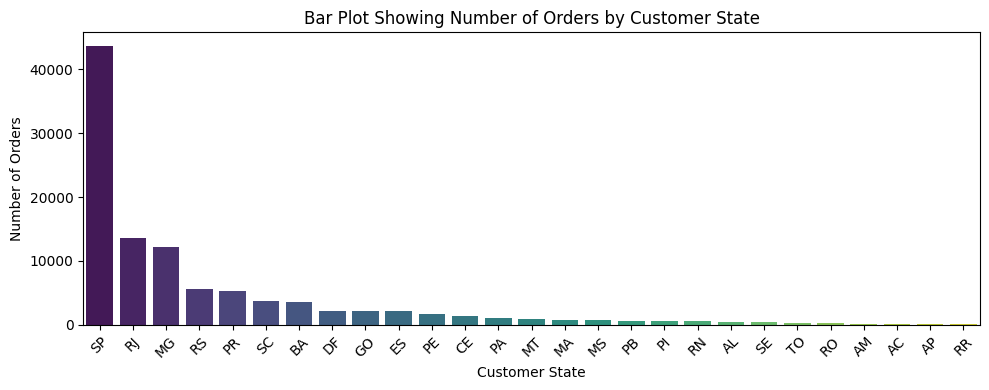

In [67]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Draw the bar plot using Seaborn
sns.barplot(
    x='customer_state',  # X-axis will be the customer state
    y='count',  # Y-axis will be the number of orders
    data=geolocation_order_grouped_df,  # DataFrame containing the data
    palette='viridis'  # Optional: You can specify a color palette
)

# Customize the labels and title
plt.xlabel('Customer State')
plt.ylabel('Number of Orders')
plt.title('Bar Plot Showing Number of Orders by Customer State')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Summary Analysis Insight
### The time period for this analysis was from September 2016 to September 2018. During this period;



*   The total number of orders placed on Olist was 98207


*   The total revenue generated by Olist was 15.74 Million Brazillian Real

*   Bed Bath Table, Health Beauty, Sport Leisure, Furniture Decor, Computer Accessories, Housewares, Watches Gifts, Telephone, Garden Tools and Auto were the most popular product categories based on their sale volume.

*   The average order value was 153.44 Brazillian Real
*   Credit card had the highest average payment value, followed by boleto and debit card. Voucher accounted for the least average payment value.


*   Computers, Small appliances home oven and coffee, Home Appliances2, Agro industry and commerce, Musical Instruments, Small Appliances, Fixed Telephone, Construction toold safety, Furniture bedroom and watches gift were the highest product categories based on the average payment value. However, Computers had the overall highest average payment value with a value of 1146.79 Brazilain Real.


*   The top 10 active sellers on Olist had 2033, 1987, 1931, 1775, 1551, 1499, 1428, 1364, 1203, and 1171 product orders respectively.


*   Most sellers received an average of 4.0 rating for their services. Only a few sellers received a low rating of (1.0 and 2.0)


*   Products with high ratings (5 ★ and 4 ★) received large orders, while products with a low ratings had a lower number of orders.

*   There were 2997 repeating customers out of 96,069 total customers, and they accounted for 19.77% of the total sales.

*   The average customer rating for all orders on olist were 4.0
*   The total number of canceled orders on olist was 1234 and the company lost 269,735 Brazillian Real, which accounted for 1.68% of its total revenue.


*   A large number of customers that shoped on Olist used credit cards to make payments and very few number of customers used debit cards.


*   The product categories that generated the highest revenue for the company were Health Beauty, Watches Gifts, Bed Bath Tables, Sports Leisure, Computers Accessories, Furniture Decor, Housewares, Cool Stuff, Auto, and Garden Tools.






























*   SP state accounted for the state with the highest number of orders, recording a total of 43,268 orders, while RR state had the least total orders of 45.




# Proposed Solutions aimed at improving the company's Performance
### Based on the insights above,here are some actions that Olist could take to boost its revenue and profit.



*   Increase advertising efforts: Based on the data, it appears that certain product categories such as Health Beauty, Watches Gifts, and Bed Bath Table generate higher revenue for Olist. Focusing on promoting these categories through targeted marketing campaigns could increase sales and revenue.

*   Offer incentives to repeat customers: Repeat customers account for a significant portion (approximately 20%) of Olist's sales. Offering incentives such as discounts, loyalty programs, or exclusive access to new products could encourage customers to continue shopping with Olist and increase revenue.


*   Improve seller ratings: Customers tend to purchase products from sellers with higher ratings. Encouraging sellers with lower ratings to improve their ratings through customer service training, better product descriptions, and timely delivery could lead to increased sales and revenue.


*   Expand payment options: While credit cards are the most popular payment method, expanding payment options to include more payment methods, such as e-wallets, could attract more customers and increase sales.


*  Improve product selection: Based on the data, certain product categories generate higher revenue for Olist. Adding more selection of products within these categories and offering exclusive or hard-to-find items could attract more customers and increase revenue. For example; if Olist currently offers a limited selection of health and beauty products, expanding the selection to include exclusive or niche brands could help the company to stand out in the market and attract new customers who are looking for those specific products.

*   Focus on reducing canceled orders: Canceled orders result in lost revenue and can damage customer trust. Implementing measures such as improved inventory management and better communication with customers could help reduce canceled orders and increase revenue.



